In [1]:
Data={'weight':['45','58','48','60','70','78','80','90','95','78','82','95','105','100','85','78','50','65','76','87','45','56','72'],
      'height':['120','135','123','145','160','162','163','175','182','170','176','182','175','183','170','177','140','159','150','167','129','140','160']}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.DataFrame(Data)
df = df.astype(int)
df.to_csv('my_data.csv')

In [21]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

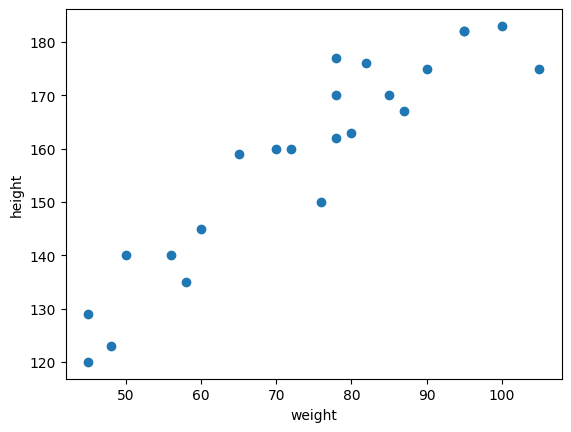

In [22]:
##scater plot
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel("height")


In [23]:
df.corr()

,weight,height
weight,1.000000,0.931142
height,0.931142,1.000000


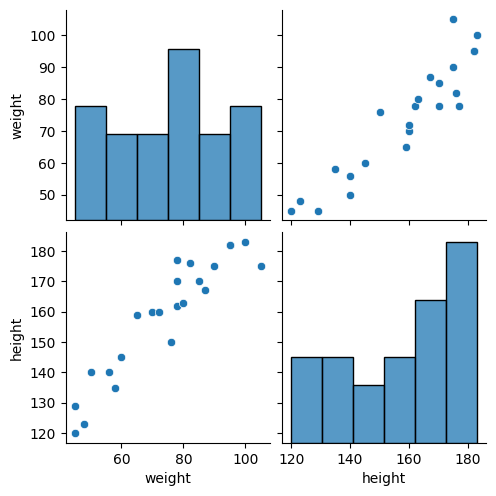

In [24]:
import seaborn as sns

sns.pairplot(df)

In [32]:
#independent and dependent feature
X=df[['weight']] #always in the 2d array
y=df['height'] #it can be in series or in one dimension


In [33]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [36]:
X_train.shape



(17, 1)

In [37]:
y_train.shape

(17,)

In [38]:
X_test.shape

(6, 1)

In [39]:

y_test.shape

(6,)

In [40]:
#standardization
from sklearn.preprocessing import StandardScaler


In [41]:
scaler=StandardScaler()
scaler.fit_transform(X_train)


array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [45]:
scaler.transform(X_test)

array([[ 0.01711717],
       [ 0.01711717],
       [-1.67748224],
       [ 0.89009262],
       [-0.6504523 ],
       [ 1.40360759]])

In [48]:
##aplly linear regresion
from sklearn.linear_model import LinearRegression
le=LinearRegression(n_jobs=-1)



In [50]:
le.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [54]:
print("regresion coeficient or slope ",le.coef_)
print("intercept: ",le.intercept_)


regresion coeficient or slope  [1.04792503]
intercept:  80.52684512622542


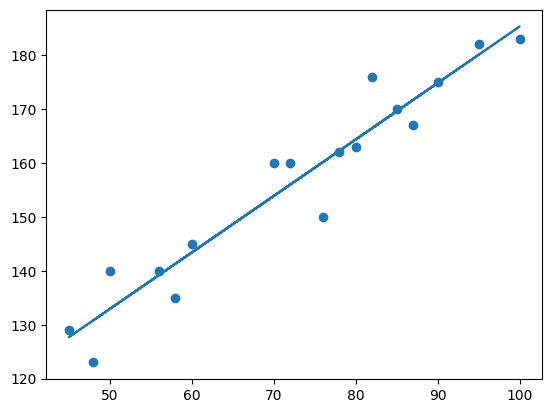

In [56]:
#plot best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,le.predict(X_train))

In [57]:
#prediction for test data 
y_pred= le.predict(X_test)


In [62]:
#performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mean squareed error",mse)
print("mean absolute error",mae)
print("root mean squared ",rmse)


mean squareed error (15    177
9     170
0     120
8     182
17    159
12    175
Name: height, dtype: int64, array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293]))
mean absolute error 9.665125886795005
root mean squared  [[13.3041347  13.03840481 10.95445115 13.49073756 12.60952021 13.22875656]
 [12.73832788 12.73832788 11.29971112 13.41937862 12.19188139 13.80430994]]


In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981279


In [66]:
##prediction for new data 
le.predict(scaler.transform([[72]]))

c:\Users\pranav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\pranav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.22190752])